# Coursework: Curves and Surfaces in Visual Computing

### Visual Computing

This notebook contains exercises related to **curves** and **surfaces** in visual computing. The exercises will guide you through implementing various curve representations, Bézier curves, Hermite curves, surface extraction, and subdivision surfaces.

## Grading Scheme (100 points total):

- **Curves Part (50 points):**
    - **Curve Representations**: 10 points
    - **Cubic and Quartic Bézier Curves**: 20 points
    - **Hermite Curves**: 20 points
- **Surfaces Part (50 points):**
    - **Surface Extraction**: 10 points
    - **Marching Cubes Algorithm**: 20 points
    - **Subdivision Surfaces (Catmull-Clark)**: 20 points

### 1. Curve Representations (10 points)
In this task, you will explore two curve representations: parametric, and implicit. Each representation has different use cases.

**Task:**
- Implement code to showcase the differences between the curve representations (parametric, implicit).
- Create use cases for each representation and provide visualization.


----------------------------------------------------------------------------------------------------------------------------

The example of shape merging is provided (two circles into a figure eight),to show where implicit curves are preferable and also different to parametric curves. If we include more shapes with more complex topological changes via merging, in more dimensions, we will have to subdivide the shape and other modifications to work with the parametric case. Instead, for implicit curves we can simply take the product of representations to merge, or other
simple combinations to obtain the new curve on its zero level set (where the function = 0).

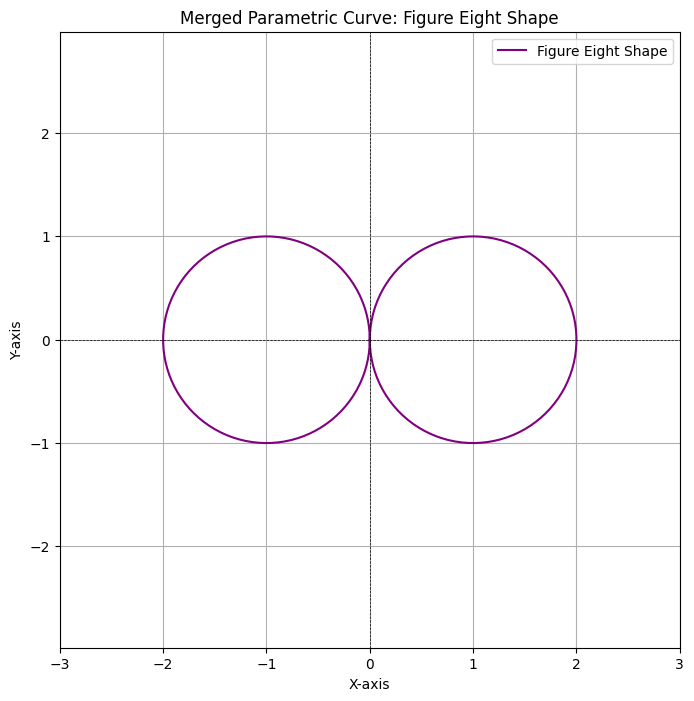

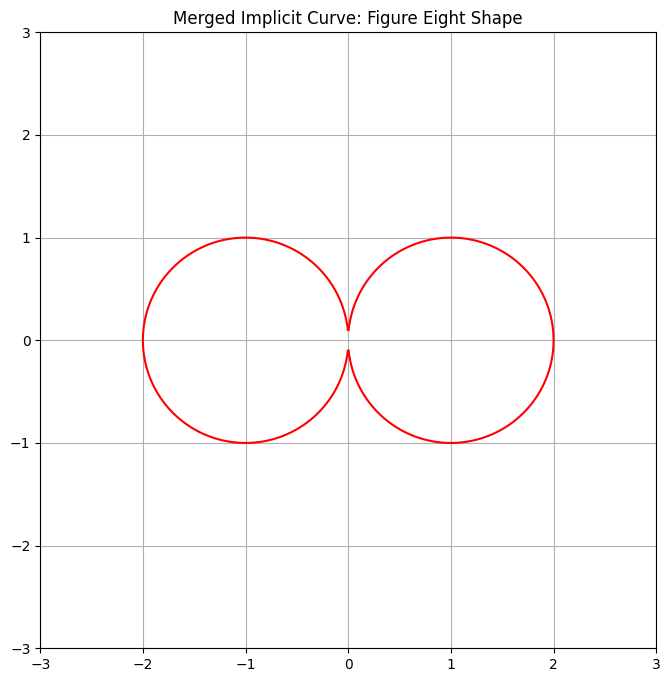

In [2]:
# Code for Curve Representations
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# SHAPE MERGING WITH PARAMETRIC REPRESENTATION.

# Parameters for the circles
r = 1  # Radius of circles
a1, b1 = -1, 0  # Center of Circle 1
a2, b2 = 1, 0   # Center of Circle 2

# Define the parameter t for the figure-eight shape
t = np.linspace(0, 2 * np.pi, 100)

# Create the left half of the figure-eight (Circle 1)
x_left = r * np.cos(t) + a1
y_left = r * np.sin(t) + b1

# Create the right half of the figure-eight (Circle 2)
x_right = r * np.cos(t + np.pi) + a2
y_right = r * np.sin(t + np.pi) + b2

# Combine left and right halves to form the figure-eight shape
x_figure_eight = np.concatenate((x_left, x_right))
y_figure_eight = np.concatenate((y_left, y_right))

# Create a new parameter t for the merged figure-eight shape
t_figure_eight = np.linspace(0, 2 * np.pi, len(x_figure_eight))

# Plotting the merged figure-eight shape
plt.figure(figsize=(8, 8))
plt.plot(x_figure_eight, y_figure_eight, color='purple', label='Figure Eight Shape')

plt.title('Merged Parametric Curve: Figure Eight Shape')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, ls='--')
plt.axvline(0, color='black', linewidth=0.5, ls='--')
plt.grid()
plt.legend()
plt.axis('equal')  # Equal scaling for x and y axes
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

# SHAPE MERGING WITH IMPLICIT REPRESENTATION.

# Define implicit circle.
def circle(x, y, a, b, r):
    return (x - a)**2 + (y - b)** 2 - r ** 2

# Create 400 evenly spaced numbers over the interval [-1, 1] for both x & y.
x_implicit = np.linspace(-10, 10, 2000)
y_implicit = np.linspace(-10, 10, 2000)
X, Y = np.meshgrid(x_implicit, y_implicit)

# Create figure-eight (merged circles).
Z1 = circle(X, Y, a1, b1, r)
Z2 = circle(X, Y, a2, b2, r)
F = Z1 * Z2

# Plot figure-eight.
plt.figure(figsize=(8, 8))
plt.contour(X, Y, F, levels=[0], colors='red')  # Plot the zero level set
plt.title('Merged Implicit Curve: Figure Eight Shape')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()

A use case that is preferable for parametric curve representations is path animation. Here we used the example of a cycloid path, simulating a ball rolling across a horizontal surface. This is easy to represent parametrically. However, the implicit expression is not a function in the general case and is very difficult to solve numerically. 


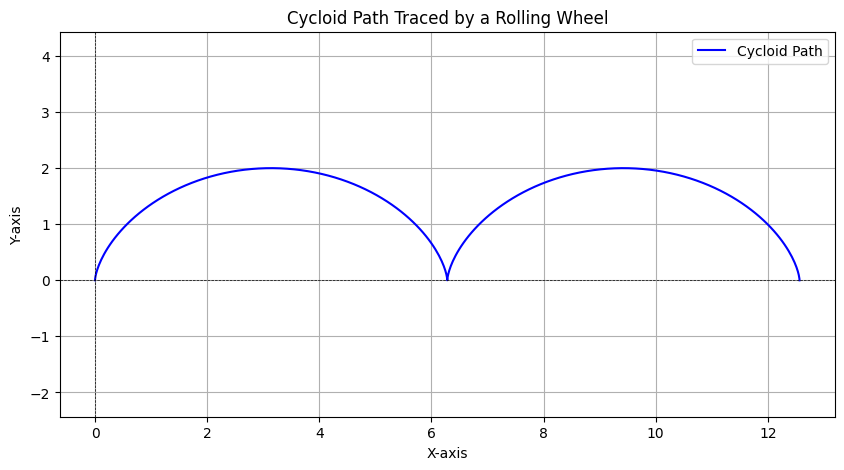

In [3]:

# PARAMETRIC IMPLEMENTATION

# Configuration for Jupyter notebook
plt.rcParams['animation.html'] = 'html5'

def generate_cycloid(r, num_points=200):
    # Generate parameter t from 0 to 4*pi (two complete cycles)
    t = np.linspace(0, 4 * np.pi, num_points)
    
    # Calculate x and y coordinates using the parametric equations
    x = r * (t - np.sin(t))
    y = r * (1 - np.cos(t))
    
    return x, y


# Parameters
radius = 1  # Radius of the rolling circle (for cycloid)
num_points = 200  # Number of points to generate for the cycloid
wheel_radius = 0.2  # Radius of the wheel representation

# Generate cycloid coordinates
x_cycloid, y_cycloid = generate_cycloid(radius, num_points)

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_cycloid, y_cycloid, label='Cycloid Path', color='blue')


# Final plot adjustments
plt.title('Cycloid Path Traced by a Rolling Wheel')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # X-axis
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # Y-axis
plt.grid()
plt.axis('equal')  # Equal scaling for both axes
plt.legend()
plt.show()

### 2. Cubic and Quartic Bézier Curves (20 points)
Bézier curves are widely used in computer graphics for modeling smooth curves.

**Task:**
- Implement both cubic and quartic Bézier curves.

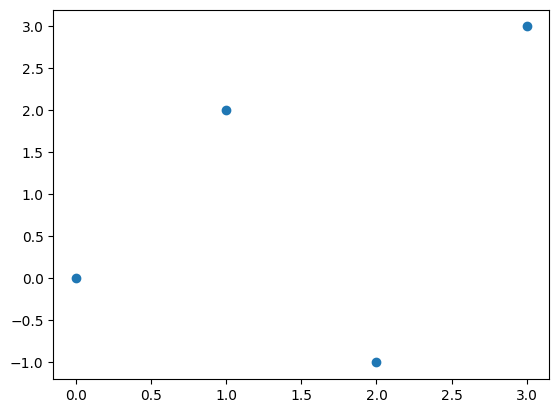

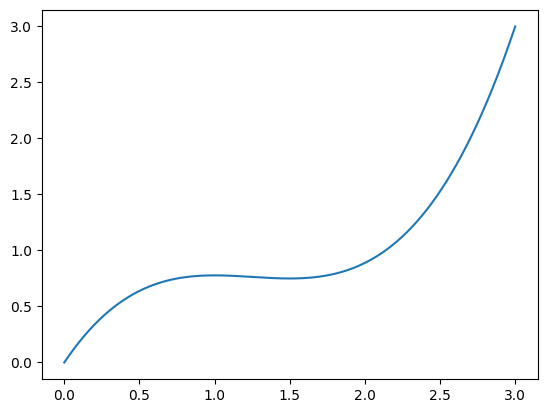

In [4]:
# Code for Bézier Curves
from scipy.special import comb

# Precompute for cubic & quartic for efficiency purposes.
def cubic_bezier(t, control_points):
    t2 = t * t
    t3 = t2 * t
    mt = 1-t
    mt2 = mt * mt
    mt3 = mt2 * mt
    
    x = (mt3 * control_points[0][0]
         + 3 * control_points[1][0] * mt2 * t +
         3 * control_points[2][0] * mt * t2 +
         control_points[3][0] * t3)
    
    y = (mt3 * control_points[0][1]
         + 3 * control_points[1][1] * mt2 * t +
         3 * control_points[2][1] * mt * t2 +
         control_points[3][1] * t3)


    return x, y


def quartic_bezier(t, control_points):
    # Calculate powers of t and (1 - t)
    t2 = t * t
    t3 = t2 * t
    t4 = t3 * t
    mt = 1 - t
    mt2 = mt * mt
    mt3 = mt2 * mt
    mt4 = mt3 * mt
    
    # Bézier equation for quartic curve using control_points[i]
    x = (mt4 * control_points[0][0] + 
         4 * mt3 * t * control_points[1][0] + 
         6 * mt2 * t2 * control_points[2][0] + 
         4 * mt * t3 * control_points[3][0] + 
         t4 * control_points[4][0])
         
    y = (mt4 * control_points[0][1] + 
         4 * mt3 * t * control_points[1][1] + 
         6 * mt2 * t2 * control_points[2][1] + 
         4 * mt * t3 * control_points[3][1] + 
         t4 * control_points[4][1])

    return x, y



def bezier(t, control_points, x, y, n):
    for i, point in enumerate(control_points):
        basis = comb(n, i) * (1 - t)**(n - i) * t**i
        x += point[0] * basis
        y += point[1] * basis
    return x, y

    
# Implement the function for Bézier curve calculation
def bezier_curve(points, num_points=1000):
  
    # Obtain the polynomial degree
    n = len(points) - 1

    # Creating t values to interpolate between.
    t_values = np.linspace(0, 1, num_points)

    curve = []
   
    for t in t_values:
        x, y = 0, 0
        match len(points):
            case 4:
                # Pre-computed cubic.
                x, y = cubic_bezier(t, points)
            case 5:
                # Pre-computed quartic.
                x, y = quartic_bezier(t, points)
            case _:
                # General definition.
                x, y = bezier(t, points, x, y, n)

        curve.append([x, y])

    return curve

# Example control points.
control_points = np.array([[0, 0], [1, 2], [2, -1], [3, 3]])
curve = bezier_curve(control_points)

# Plot control points without interpolation.
a, b = zip(*control_points)
plt.scatter(a, b)
plt.show()

# Plot Bézier curve and control points.
x, y = zip(*curve)
plt.plot(x, y)
plt.show()


### 3. Hermite Curves (20 points)
Hermite curves are defined by endpoints and tangents at those endpoints.

**Task:**
- Implement Hermite curves and demonstrate their flexibility by adjusting tangents.


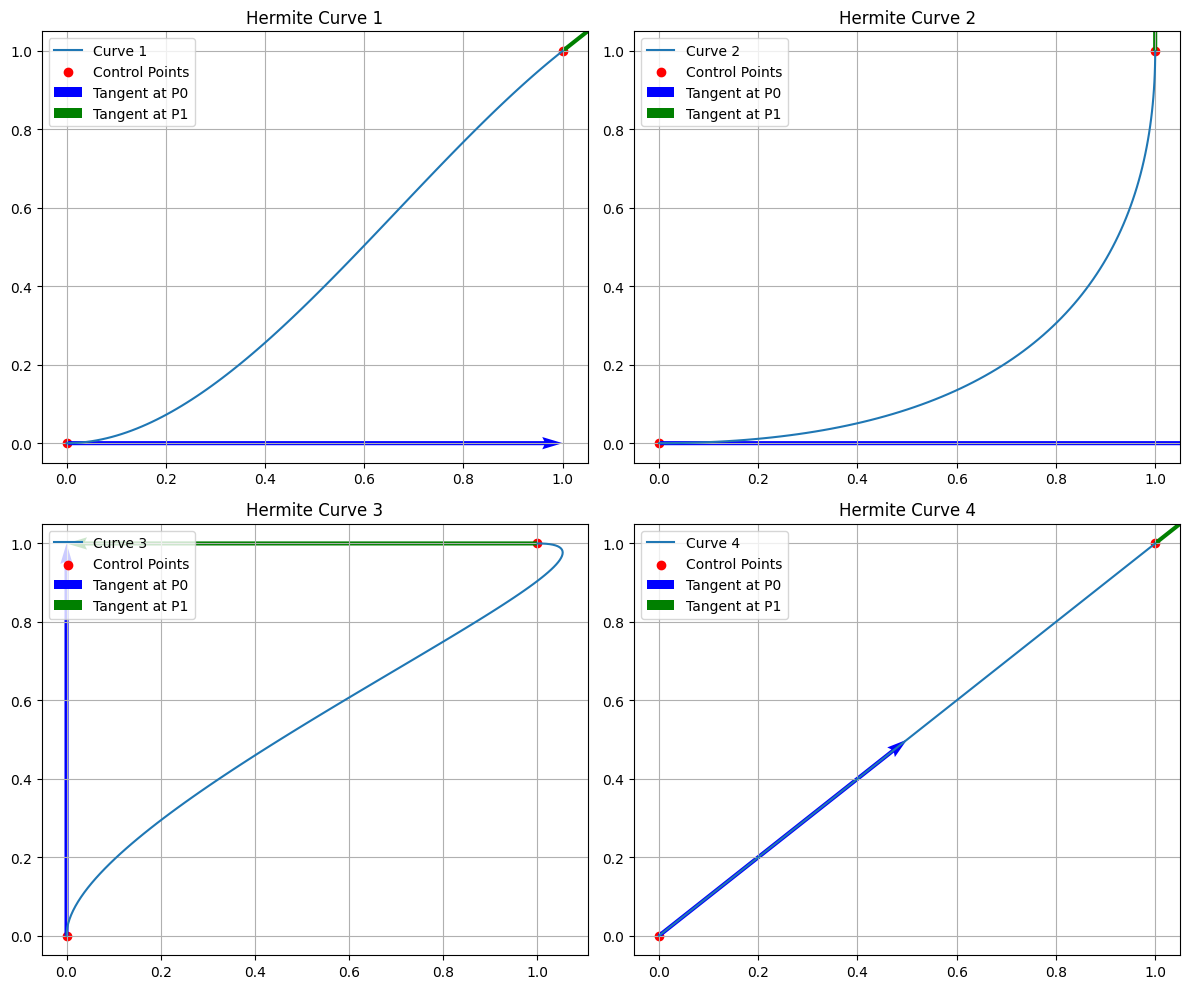

In [5]:
# Code for Hermite Curves
def hermite_curve(P0, P1, T0, T1, num_points=100):
    # Generate t values between 0 and 1
    t_values = np.linspace(0, 1, num_points)

    # Hermite basis functions (h00, h10, h01, h11)
    h00 = lambda t: 2 * (t**3) - 3 * (t**2) + 1
    h10 = lambda t: (t**3) - 2 * (t**2) + t
    h01 = lambda t: (-2 * (t**3)) + (3 * (t**2))
    h11 = lambda t: (t**3) - (t**2)

    curve = []  

    for t in t_values:
        # Calculate the point on the Hermite curve using the basis functions
        point = (h00(t) * P0) + (h10(t) * T0) + (h01(t) * P1) + (h11(t) * T1)
        curve.append(point)  

    return curve  

# Example Hermite curve
P0 = np.array([0, 0])  # Starting point
P1 = np.array([1, 1])  # Ending point

# Different tangent vectors to demonstrate flexibility
tangents = [
    (np.array([1, 0]), np.array([1, 1])),    # Original tangents
    (np.array([2, 0]), np.array([0, 2])),    # Exaggerated horizontal and vertical tangents
    (np.array([0, 1]), np.array([-1, 0])),   # Vertical start, horizontal end
    (np.array([0.5, 0.5]), np.array([0.5, 0.5])),  # Symmetric tangents
]

plt.figure(figsize=(12, 10))

for i, (T0, T1) in enumerate(tangents):
    curve = hermite_curve(P0, P1, T0, T1)
    x, y = zip(*curve)
    
    plt.subplot(2, 2, i+1)
    plt.plot(x, y, label=f"Curve {i+1}")
    plt.scatter([P0[0], P1[0]], [P0[1], P1[1]], color='red', label="Control Points")
    plt.quiver(P0[0], P0[1], T0[0], T0[1], angles='xy', scale_units='xy', scale=1, color="blue", label="Tangent at P0")
    plt.quiver(P1[0], P1[1], T1[0], T1[1], angles='xy', scale_units='xy', scale=1, color="green", label="Tangent at P1")
    
    plt.title(f"Hermite Curve {i+1}")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

### 4. Surface Extraction (10 points)
Surface extraction involves evaluating a surface function and determining if points lie on the surface.

**Task:**
- Implement a simple function to extract surfaces from a scalar field (such as a sphere).


In [9]:
# Code for Surface Extraction
def scalar_field_surface(x, y, z, r=1):
    # Define surface function (e.g., sphere x^2 + y^2 + z^2 = r^2)
    return x**2 + y**2 + z**2 - r**2

# Grid evaluation for scalar field

## Define 300x300x300 grid of points.
x = np.linspace(-r, r, 300)
y = np.linspace(-r, r, 300)
z = np.linspace(-r, r, 300)
X, Y, Z = np.meshgrid(x, y, z)

## Obtain surface scalars for a sphere in the grid.
scalars = scalar_field_surface(X, Y, Z) 

# Extract surface by plotting points where scalar field = 0

## Define a reasonable tolerable range from zero.
tolerance = 1e-3

## Extract all surface scalars in this range.
surface = np.where(np.isclose(scalars, 0, atol=tolerance))
print(surface)


(array([  0,   0,   0, ..., 299, 299, 299]), array([145, 145, 146, ..., 153, 154, 154]), array([149, 150, 147, ..., 152, 149, 150]))


### 5. Marching Cubes Algorithm (20 points)
The Marching Cubes algorithm is a popular technique for extracting surfaces from 3D volume data.

**Task:**
- Implement the Marching Cubes algorithm or use a library like `scikit-image` to demonstrate it with a 3D scalar field.
- **Students must fill in the scalar field and use Marching Cubes to extract the surface.**

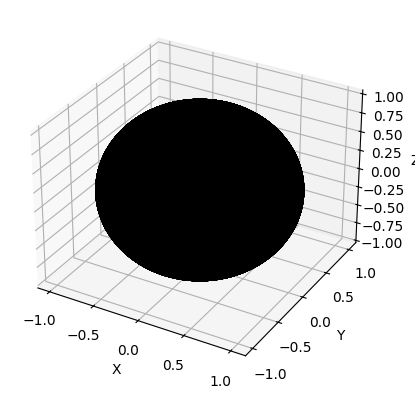

In [85]:
# Code for Marching Cubes Algorithm
from skimage import measure
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Volume data generation (e.g., sphere or another shape)
def volume_data_surface(resolution=100, r=1):
    x = np.linspace(-r, r, resolution)
    y = np.linspace(-r, r, resolution)
    z = np.linspace(-r, r, resolution)
    X, Y, Z = np.meshgrid(x, y, z)

    # Return sphere scalar field.
    return x, y, z, X**2 + Y**2 + Z**2 - r**2


def get_vertices(voxel, spacing):
    center_x, center_y, center_z = voxel[0], voxel[1], voxel[2]

    vertices = [
        # Bottom-left-front
        (center_x - spacing / 2, center_y - spacing / 2, center_z - spacing / 2),
        # Bottom-left-back
        (center_x - spacing / 2, center_y - spacing / 2, center_z + spacing / 2),
        # Bottom-right-front
        (center_x + spacing / 2, center_y - spacing / 2, center_z - spacing / 2),
        # Bottom-right-back
        (center_x + spacing / 2, center_y - spacing / 2, center_z + spacing / 2),
        # Top-left-front
        (center_x - spacing / 2, center_y + spacing / 2, center_z - spacing / 2),
        # Top-left-back
        (center_x - spacing / 2, center_y + spacing / 2, center_z + spacing / 2),
        # Top-right-front
        (center_x + spacing / 2, center_y + spacing / 2, center_z - spacing / 2),
        # Top-right-back
        (center_x + spacing / 2, center_y + spacing / 2, center_z + spacing / 2)
    ]

    return vertices


# Triangle surface intersection cases for Marching Cubes (256).
cases = [[],
 [[8, 0, 3]],
 [[1, 0, 9]],
 [[8, 1, 3], [8, 9, 1]],
 [[10, 2, 1]],
 [[8, 0, 3], [1, 10, 2]],
 [[9, 2, 0], [9, 10, 2]],
 [[3, 8, 2], [2, 8, 10], [10, 8, 9]],
 [[3, 2, 11]],
 [[0, 2, 8], [2, 11, 8]],
 [[1, 0, 9], [2, 11, 3]],
 [[2, 9, 1], [11, 9, 2], [8, 9, 11]],
 [[3, 10, 11], [3, 1, 10]],
 [[1, 10, 0], [0, 10, 8], [8, 10, 11]],
 [[0, 11, 3], [9, 11, 0], [10, 11, 9]],
 [[8, 9, 11], [11, 9, 10]],
 [[7, 4, 8]],
 [[3, 7, 0], [7, 4, 0]],
 [[7, 4, 8], [9, 1, 0]],
 [[9, 1, 4], [4, 1, 7], [7, 1, 3]],
 [[7, 4, 8], [2, 1, 10]],
 [[4, 3, 7], [4, 0, 3], [2, 1, 10]],
 [[2, 0, 10], [0, 9, 10], [7, 4, 8]],
 [[9, 10, 4], [4, 10, 3], [3, 10, 2], [4, 3, 7]],
 [[4, 8, 7], [3, 2, 11]],
 [[7, 4, 11], [11, 4, 2], [2, 4, 0]],
 [[1, 0, 9], [2, 11, 3], [8, 7, 4]],
 [[2, 11, 1], [1, 11, 9], [9, 11, 7], [9, 7, 4]],
 [[10, 11, 1], [11, 3, 1], [4, 8, 7]],
 [[4, 0, 7], [7, 0, 10], [0, 1, 10], [7, 10, 11]],
 [[7, 4, 8], [0, 11, 3], [9, 11, 0], [10, 11, 9]],
 [[4, 11, 7], [9, 11, 4], [10, 11, 9]],
 [[9, 4, 5]],
 [[9, 4, 5], [0, 3, 8]],
 [[0, 5, 1], [0, 4, 5]],
 [[4, 3, 8], [5, 3, 4], [1, 3, 5]],
 [[5, 9, 4], [10, 2, 1]],
 [[8, 0, 3], [1, 10, 2], [4, 5, 9]],
 [[10, 4, 5], [2, 4, 10], [0, 4, 2]],
 [[3, 10, 2], [8, 10, 3], [5, 10, 8], [4, 5, 8]],
 [[9, 4, 5], [11, 3, 2]],
 [[11, 0, 2], [11, 8, 0], [9, 4, 5]],
 [[5, 1, 4], [1, 0, 4], [11, 3, 2]],
 [[5, 1, 4], [4, 1, 11], [1, 2, 11], [4, 11, 8]],
 [[3, 10, 11], [3, 1, 10], [5, 9, 4]],
 [[9, 4, 5], [1, 10, 0], [0, 10, 8], [8, 10, 11]],
 [[5, 0, 4], [11, 0, 5], [11, 3, 0], [10, 11, 5]],
 [[5, 10, 4], [4, 10, 8], [8, 10, 11]],
 [[9, 7, 5], [9, 8, 7]],
 [[0, 5, 9], [3, 5, 0], [7, 5, 3]],
 [[8, 7, 0], [0, 7, 1], [1, 7, 5]],
 [[7, 5, 3], [3, 5, 1]],
 [[7, 5, 8], [5, 9, 8], [2, 1, 10]],
 [[10, 2, 1], [0, 5, 9], [3, 5, 0], [7, 5, 3]],
 [[8, 2, 0], [5, 2, 8], [10, 2, 5], [7, 5, 8]],
 [[2, 3, 10], [10, 3, 5], [5, 3, 7]],
 [[9, 7, 5], [9, 8, 7], [11, 3, 2]],
 [[0, 2, 9], [9, 2, 7], [7, 2, 11], [9, 7, 5]],
 [[3, 2, 11], [8, 7, 0], [0, 7, 1], [1, 7, 5]],
 [[11, 1, 2], [7, 1, 11], [5, 1, 7]],
 [[3, 1, 11], [11, 1, 10], [8, 7, 9], [9, 7, 5]],
 [[11, 7, 0], [7, 5, 0], [5, 9, 0], [10, 11, 0], [1, 10, 0]],
 [[0, 5, 10], [0, 7, 5], [0, 8, 7], [0, 10, 11], [0, 11, 3]],
 [[10, 11, 5], [11, 7, 5]],
 [[5, 6, 10]],
 [[8, 0, 3], [10, 5, 6]],
 [[0, 9, 1], [5, 6, 10]],
 [[8, 1, 3], [8, 9, 1], [10, 5, 6]],
 [[1, 6, 2], [1, 5, 6]],
 [[6, 2, 5], [2, 1, 5], [8, 0, 3]],
 [[5, 6, 9], [9, 6, 0], [0, 6, 2]],
 [[5, 8, 9], [2, 8, 5], [3, 8, 2], [6, 2, 5]],
 [[3, 2, 11], [10, 5, 6]],
 [[0, 2, 8], [2, 11, 8], [5, 6, 10]],
 [[3, 2, 11], [0, 9, 1], [10, 5, 6]],
 [[5, 6, 10], [2, 9, 1], [11, 9, 2], [8, 9, 11]],
 [[11, 3, 6], [6, 3, 5], [5, 3, 1]],
 [[11, 8, 6], [6, 8, 1], [1, 8, 0], [6, 1, 5]],
 [[5, 0, 9], [6, 0, 5], [3, 0, 6], [11, 3, 6]],
 [[6, 9, 5], [11, 9, 6], [8, 9, 11]],
 [[7, 4, 8], [6, 10, 5]],
 [[3, 7, 0], [7, 4, 0], [10, 5, 6]],
 [[7, 4, 8], [6, 10, 5], [9, 1, 0]],
 [[5, 6, 10], [9, 1, 4], [4, 1, 7], [7, 1, 3]],
 [[1, 6, 2], [1, 5, 6], [7, 4, 8]],
 [[6, 1, 5], [2, 1, 6], [0, 7, 4], [3, 7, 0]],
 [[4, 8, 7], [5, 6, 9], [9, 6, 0], [0, 6, 2]],
 [[2, 3, 9], [3, 7, 9], [7, 4, 9], [6, 2, 9], [5, 6, 9]],
 [[2, 11, 3], [7, 4, 8], [10, 5, 6]],
 [[6, 10, 5], [7, 4, 11], [11, 4, 2], [2, 4, 0]],
 [[1, 0, 9], [8, 7, 4], [3, 2, 11], [5, 6, 10]],
 [[1, 2, 9], [9, 2, 11], [9, 11, 4], [4, 11, 7], [5, 6, 10]],
 [[7, 4, 8], [11, 3, 6], [6, 3, 5], [5, 3, 1]],
 [[11, 0, 1], [11, 4, 0], [11, 7, 4], [11, 1, 5], [11, 5, 6]],
 [[6, 9, 5], [0, 9, 6], [11, 0, 6], [3, 0, 11], [4, 8, 7]],
 [[5, 6, 9], [9, 6, 11], [9, 11, 7], [9, 7, 4]],
 [[4, 10, 9], [4, 6, 10]],
 [[10, 4, 6], [10, 9, 4], [8, 0, 3]],
 [[1, 0, 10], [10, 0, 6], [6, 0, 4]],
 [[8, 1, 3], [6, 1, 8], [6, 10, 1], [4, 6, 8]],
 [[9, 2, 1], [4, 2, 9], [6, 2, 4]],
 [[3, 8, 0], [9, 2, 1], [4, 2, 9], [6, 2, 4]],
 [[0, 4, 2], [2, 4, 6]],
 [[8, 2, 3], [4, 2, 8], [6, 2, 4]],
 [[4, 10, 9], [4, 6, 10], [2, 11, 3]],
 [[11, 8, 2], [2, 8, 0], [6, 10, 4], [4, 10, 9]],
 [[2, 11, 3], [1, 0, 10], [10, 0, 6], [6, 0, 4]],
 [[8, 4, 1], [4, 6, 1], [6, 10, 1], [11, 8, 1], [2, 11, 1]],
 [[3, 1, 11], [11, 1, 4], [1, 9, 4], [11, 4, 6]],
 [[6, 11, 1], [11, 8, 1], [8, 0, 1], [4, 6, 1], [9, 4, 1]],
 [[3, 0, 11], [11, 0, 6], [6, 0, 4]],
 [[4, 11, 8], [4, 6, 11]],
 [[6, 8, 7], [10, 8, 6], [9, 8, 10]],
 [[3, 7, 0], [0, 7, 10], [7, 6, 10], [0, 10, 9]],
 [[1, 6, 10], [0, 6, 1], [7, 6, 0], [8, 7, 0]],
 [[10, 1, 6], [6, 1, 7], [7, 1, 3]],
 [[9, 8, 1], [1, 8, 6], [6, 8, 7], [1, 6, 2]],
 [[9, 7, 6], [9, 3, 7], [9, 0, 3], [9, 6, 2], [9, 2, 1]],
 [[7, 6, 8], [8, 6, 0], [0, 6, 2]],
 [[3, 6, 2], [3, 7, 6]],
 [[3, 2, 11], [6, 8, 7], [10, 8, 6], [9, 8, 10]],
 [[7, 9, 0], [7, 10, 9], [7, 6, 10], [7, 0, 2], [7, 2, 11]],
 [[0, 10, 1], [6, 10, 0], [8, 6, 0], [7, 6, 8], [2, 11, 3]],
 [[1, 6, 10], [7, 6, 1], [11, 7, 1], [2, 11, 1]],
 [[1, 9, 6], [9, 8, 6], [8, 7, 6], [3, 1, 6], [11, 3, 6]],
 [[9, 0, 1], [11, 7, 6]],
 [[0, 11, 3], [6, 11, 0], [7, 6, 0], [8, 7, 0]],
 [[7, 6, 11]],
 [[11, 6, 7]],
 [[3, 8, 0], [11, 6, 7]],
 [[1, 0, 9], [6, 7, 11]],
 [[1, 3, 9], [3, 8, 9], [6, 7, 11]],
 [[10, 2, 1], [6, 7, 11]],
 [[10, 2, 1], [3, 8, 0], [6, 7, 11]],
 [[9, 2, 0], [9, 10, 2], [11, 6, 7]],
 [[11, 6, 7], [3, 8, 2], [2, 8, 10], [10, 8, 9]],
 [[2, 6, 3], [6, 7, 3]],
 [[8, 6, 7], [0, 6, 8], [2, 6, 0]],
 [[7, 2, 6], [7, 3, 2], [1, 0, 9]],
 [[8, 9, 7], [7, 9, 2], [2, 9, 1], [7, 2, 6]],
 [[6, 1, 10], [7, 1, 6], [3, 1, 7]],
 [[8, 0, 7], [7, 0, 6], [6, 0, 1], [6, 1, 10]],
 [[7, 3, 6], [6, 3, 9], [3, 0, 9], [6, 9, 10]],
 [[7, 8, 6], [6, 8, 10], [10, 8, 9]],
 [[8, 11, 4], [11, 6, 4]],
 [[11, 0, 3], [6, 0, 11], [4, 0, 6]],
 [[6, 4, 11], [4, 8, 11], [1, 0, 9]],
 [[1, 3, 9], [9, 3, 6], [3, 11, 6], [9, 6, 4]],
 [[8, 11, 4], [11, 6, 4], [1, 10, 2]],
 [[1, 10, 2], [11, 0, 3], [6, 0, 11], [4, 0, 6]],
 [[2, 9, 10], [0, 9, 2], [4, 11, 6], [8, 11, 4]],
 [[3, 4, 9], [3, 6, 4], [3, 11, 6], [3, 9, 10], [3, 10, 2]],
 [[3, 2, 8], [8, 2, 4], [4, 2, 6]],
 [[2, 4, 0], [6, 4, 2]],
 [[0, 9, 1], [3, 2, 8], [8, 2, 4], [4, 2, 6]],
 [[1, 2, 9], [9, 2, 4], [4, 2, 6]],
 [[10, 3, 1], [4, 3, 10], [4, 8, 3], [6, 4, 10]],
 [[10, 0, 1], [6, 0, 10], [4, 0, 6]],
 [[3, 10, 6], [3, 9, 10], [3, 0, 9], [3, 6, 4], [3, 4, 8]],
 [[9, 10, 4], [10, 6, 4]],
 [[9, 4, 5], [7, 11, 6]],
 [[9, 4, 5], [7, 11, 6], [0, 3, 8]],
 [[0, 5, 1], [0, 4, 5], [6, 7, 11]],
 [[11, 6, 7], [4, 3, 8], [5, 3, 4], [1, 3, 5]],
 [[1, 10, 2], [9, 4, 5], [6, 7, 11]],
 [[8, 0, 3], [4, 5, 9], [10, 2, 1], [11, 6, 7]],
 [[7, 11, 6], [10, 4, 5], [2, 4, 10], [0, 4, 2]],
 [[8, 2, 3], [10, 2, 8], [4, 10, 8], [5, 10, 4], [11, 6, 7]],
 [[2, 6, 3], [6, 7, 3], [9, 4, 5]],
 [[5, 9, 4], [8, 6, 7], [0, 6, 8], [2, 6, 0]],
 [[7, 3, 6], [6, 3, 2], [4, 5, 0], [0, 5, 1]],
 [[8, 1, 2], [8, 5, 1], [8, 4, 5], [8, 2, 6], [8, 6, 7]],
 [[9, 4, 5], [6, 1, 10], [7, 1, 6], [3, 1, 7]],
 [[7, 8, 6], [6, 8, 0], [6, 0, 10], [10, 0, 1], [5, 9, 4]],
 [[3, 0, 10], [0, 4, 10], [4, 5, 10], [7, 3, 10], [6, 7, 10]],
 [[8, 6, 7], [10, 6, 8], [5, 10, 8], [4, 5, 8]],
 [[5, 9, 6], [6, 9, 11], [11, 9, 8]],
 [[11, 6, 3], [3, 6, 0], [0, 6, 5], [0, 5, 9]],
 [[8, 11, 0], [0, 11, 5], [5, 11, 6], [0, 5, 1]],
 [[6, 3, 11], [5, 3, 6], [1, 3, 5]],
 [[10, 2, 1], [5, 9, 6], [6, 9, 11], [11, 9, 8]],
 [[3, 11, 0], [0, 11, 6], [0, 6, 9], [9, 6, 5], [1, 10, 2]],
 [[0, 8, 5], [8, 11, 5], [11, 6, 5], [2, 0, 5], [10, 2, 5]],
 [[11, 6, 3], [3, 6, 5], [3, 5, 10], [3, 10, 2]],
 [[3, 9, 8], [6, 9, 3], [5, 9, 6], [2, 6, 3]],
 [[9, 6, 5], [0, 6, 9], [2, 6, 0]],
 [[6, 5, 8], [5, 1, 8], [1, 0, 8], [2, 6, 8], [3, 2, 8]],
 [[2, 6, 1], [6, 5, 1]],
 [[6, 8, 3], [6, 9, 8], [6, 5, 9], [6, 3, 1], [6, 1, 10]],
 [[1, 10, 0], [0, 10, 6], [0, 6, 5], [0, 5, 9]],
 [[3, 0, 8], [6, 5, 10]],
 [[10, 6, 5]],
 [[5, 11, 10], [5, 7, 11]],
 [[5, 11, 10], [5, 7, 11], [3, 8, 0]],
 [[11, 10, 7], [10, 5, 7], [0, 9, 1]],
 [[5, 7, 10], [10, 7, 11], [9, 1, 8], [8, 1, 3]],
 [[2, 1, 11], [11, 1, 7], [7, 1, 5]],
 [[3, 8, 0], [2, 1, 11], [11, 1, 7], [7, 1, 5]],
 [[2, 0, 11], [11, 0, 5], [5, 0, 9], [11, 5, 7]],
 [[2, 9, 5], [2, 8, 9], [2, 3, 8], [2, 5, 7], [2, 7, 11]],
 [[10, 3, 2], [5, 3, 10], [7, 3, 5]],
 [[10, 0, 2], [7, 0, 10], [8, 0, 7], [5, 7, 10]],
 [[0, 9, 1], [10, 3, 2], [5, 3, 10], [7, 3, 5]],
 [[7, 8, 2], [8, 9, 2], [9, 1, 2], [5, 7, 2], [10, 5, 2]],
 [[3, 1, 7], [7, 1, 5]],
 [[0, 7, 8], [1, 7, 0], [5, 7, 1]],
 [[9, 5, 0], [0, 5, 3], [3, 5, 7]],
 [[5, 7, 9], [7, 8, 9]],
 [[4, 10, 5], [8, 10, 4], [11, 10, 8]],
 [[3, 4, 0], [10, 4, 3], [10, 5, 4], [11, 10, 3]],
 [[1, 0, 9], [4, 10, 5], [8, 10, 4], [11, 10, 8]],
 [[4, 3, 11], [4, 1, 3], [4, 9, 1], [4, 11, 10], [4, 10, 5]],
 [[1, 5, 2], [2, 5, 8], [5, 4, 8], [2, 8, 11]],
 [[5, 4, 11], [4, 0, 11], [0, 3, 11], [1, 5, 11], [2, 1, 11]],
 [[5, 11, 2], [5, 8, 11], [5, 4, 8], [5, 2, 0], [5, 0, 9]],
 [[5, 4, 9], [2, 3, 11]],
 [[3, 4, 8], [2, 4, 3], [5, 4, 2], [10, 5, 2]],
 [[5, 4, 10], [10, 4, 2], [2, 4, 0]],
 [[2, 8, 3], [4, 8, 2], [10, 4, 2], [5, 4, 10], [0, 9, 1]],
 [[4, 10, 5], [2, 10, 4], [1, 2, 4], [9, 1, 4]],
 [[8, 3, 4], [4, 3, 5], [5, 3, 1]],
 [[1, 5, 0], [5, 4, 0]],
 [[5, 0, 9], [3, 0, 5], [8, 3, 5], [4, 8, 5]],
 [[5, 4, 9]],
 [[7, 11, 4], [4, 11, 9], [9, 11, 10]],
 [[8, 0, 3], [7, 11, 4], [4, 11, 9], [9, 11, 10]],
 [[0, 4, 1], [1, 4, 11], [4, 7, 11], [1, 11, 10]],
 [[10, 1, 4], [1, 3, 4], [3, 8, 4], [11, 10, 4], [7, 11, 4]],
 [[9, 4, 1], [1, 4, 2], [2, 4, 7], [2, 7, 11]],
 [[1, 9, 2], [2, 9, 4], [2, 4, 11], [11, 4, 7], [3, 8, 0]],
 [[11, 4, 7], [2, 4, 11], [0, 4, 2]],
 [[7, 11, 4], [4, 11, 2], [4, 2, 3], [4, 3, 8]],
 [[10, 9, 2], [2, 9, 7], [7, 9, 4], [2, 7, 3]],
 [[2, 10, 7], [10, 9, 7], [9, 4, 7], [0, 2, 7], [8, 0, 7]],
 [[10, 4, 7], [10, 0, 4], [10, 1, 0], [10, 7, 3], [10, 3, 2]],
 [[8, 4, 7], [10, 1, 2]],
 [[4, 1, 9], [7, 1, 4], [3, 1, 7]],
 [[8, 0, 7], [7, 0, 1], [7, 1, 9], [7, 9, 4]],
 [[0, 7, 3], [0, 4, 7]],
 [[8, 4, 7]],
 [[9, 8, 10], [10, 8, 11]],
 [[3, 11, 0], [0, 11, 9], [9, 11, 10]],
 [[0, 10, 1], [8, 10, 0], [11, 10, 8]],
 [[11, 10, 3], [10, 1, 3]],
 [[1, 9, 2], [2, 9, 11], [11, 9, 8]],
 [[9, 2, 1], [11, 2, 9], [3, 11, 9], [0, 3, 9]],
 [[8, 2, 0], [8, 11, 2]],
 [[11, 2, 3]],
 [[2, 8, 3], [10, 8, 2], [9, 8, 10]],
 [[0, 2, 9], [2, 10, 9]],
 [[3, 2, 8], [8, 2, 10], [8, 10, 1], [8, 1, 0]],
 [[1, 2, 10]],
 [[3, 1, 8], [1, 9, 8]],
 [[9, 0, 1]],
 [[3, 0, 8]],
 []]


def interpolate_edge(p1, p2, d1, d2, iso):
    if abs(d1 - d2) < 1e-6:
        return p1
    
    t = (iso - d1) / (d2 - d1)

    x = p1[0] + t * (p2[0] - p1[0])
    y = p1[1] + t * (p2[1] - p1[1])
    z = p1[2] + t * (p2[2] - p1[2])

    return (x, y, z)

def marching_cubes(x_voxels, y_voxels, z_voxels, scalars, r=1, iso=0):
    # Obtain resolution from the volume data.
    resolution = volume.shape[0]

    # Obtain even voxel spacing for vertex position computation.
    spacing = 2 * r / resolution

    faces = []


    for i in range(resolution):
        for j in range(resolution):
            for k in range(resolution):
                # Obtain voxel center co-ordinates & corresponding vertices.
                voxel = [x_voxels[i], y_voxels[j], z_voxels[k]]
                vertices = get_vertices(voxel, spacing)
                tri_index = 0
                densities = []

                for v_index, vertex in enumerate(vertices):
                    # Normalised, type coerced and correctly scaled the vertices.
                    x_index = int((vertex[0] + r) * (resolution - 1) / (2 * r))
                    y_index = int((vertex[1] + r) * (resolution - 1) / (2 * r))
                    z_index = int((vertex[2] + r) * (resolution - 1) / (2 * r))
                    # Compute density from scalar field.
                    density = scalars[x_index, y_index, z_index]
                    densities.append(density)
                    # Using default iso value = 0.
                    if density <= iso:
                        # Index can be in 256 possible configurations (may reduce to 15-18).
                        tri_index |= (1 << v_index)


                # Match triangle configuration.
                triangles = cases[tri_index]
                if len(triangles) == 0:
                    continue
                
                # Interpolate
                edges = {0: (0, 1), 1: (1, 2), 2: (2, 3), 3: (3, 0), 4: (4, 5), 5: (5, 6), 6: (6, 7),
                         7: (7, 4), 8: (0, 4), 9: (1, 5), 10: (2, 6), 11: (3, 7)}
                
                for triangle in triangles:
                    interpolated = []
                    for edge in triangle:
                        v1, v2 = edges[edge]
                        p1, p2 = vertices[v1], vertices[v2]
                        d1, d2 = densities[v1], densities[v2]
                        interpolated.append(interpolate_edge(p1, p2, d1, d2, iso))


                    # Form triangle by connecting interpolated vertices.
                    faces.append(interpolated)
    
    return faces
                
                




# Approach.
# (1) Extract voxel array. 
# (2) Generate 8 vertices for each voxel center.
# (3) Compute density (distance to center of sphere?). 
# (4) Match triangle configuration against look-up table (15-18 configurations).
# (5) Apply the appropriate configuration for each voxel.



# Implement marching cubes
x_voxels, y_voxels, z_voxels, volume = volume_data_surface()
faces = marching_cubes(x_voxels, y_voxels, z_voxels, volume)


# Plot extracted surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

mesh = Poly3DCollection(faces, alpha=0.7, edgecolors='k')
ax.add_collection3d(mesh)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()






### 6. Subdivision Surfaces (Pixar-style) (5 points + bonus 15 points)

Subdivision surfaces are widely used in computer graphics to smooth out meshes by iterative subdivision. This process is heavily utilized in the creation of complex animated characters and detailed objects, like those seen in Pixar movies.

**Task:**
- Implement a basic subdivision surface algorithm (e.g., Catmull-Clark) to smooth a 3D mesh.
- Demonstrate how subdivision surfaces are used in the creation of complex animated characters (like Pixar movies).

In [59]:
""" Catmull-Clark Algorithm by using a prebuilt library"""
import numpy as np
import trimesh
import os

# Use trimesh library to apply subdivisions
current_dir = os.getcwd()
parent = os.path.dirname(current_dir)
mesh_pth = os.path.join(parent, "LowPolyBunny.obj")

mesh = trimesh.load(mesh_pth)
mesh.show()
new_mesh = None

vertices, faces = trimesh.remesh.subdivide_loop(mesh.vertices, mesh.faces)
new_mesh = trimesh.Trimesh(vertices=vertices, faces=faces)

# Start with low poly control mesh.
# The new mesh has more points for rigging (better animation)
# and the form is high-poly and as such more well-defined.
new_mesh.show()





#### Bonus (15 points)

**Task:**
- Implement Catmull-Clark from scratch.

Dive into how Catmull-Clark subdivision surfaces work and implement the Catmull-Clark algorithm without relying on external libraries like `trimesh`. This algorithm is widely used to smooth out a mesh by iteratively refining the geometry. It generates smoother surfaces by splitting faces, edges, and adding new vertices based on weighted averages of neighboring vertices.

### Steps of the Catmull-Clark Algorithm:

1. **Face Points:**
   - For each face in the mesh, compute the centroid (average of all vertices of the face) and store it as a face point.

2. **Edge Points:**
   - For each edge, compute the average of the midpoints of the edge and the centroids of the two faces adjacent to the edge. This becomes the edge point.

3. **Updated Original Vertex Positions:**
   - For each vertex, update its position as a weighted average of the original vertex, the adjacent face points, and the edge midpoints.

4. **Splitting Faces:**
   - Split each face into smaller faces using the new face points, edge points, and original vertices.

The goal is to generate smoother surfaces after each subdivision iteration, allowing the mesh to be refined and smoothed. This technique is fundamental in character modeling and animation in industries like movie production, including Pixar-style animations.


Original Mesh


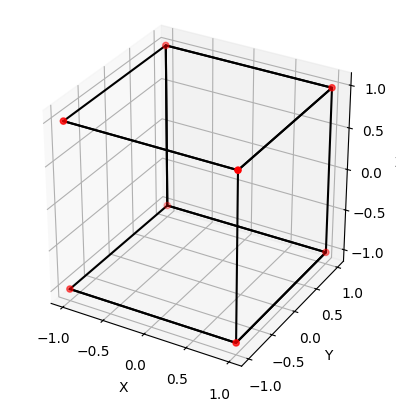

Subdivided Mesh


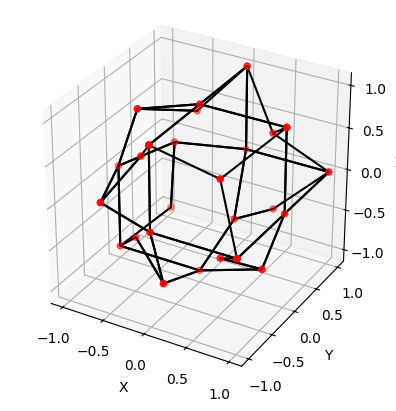

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class CatmullClark:
    def __init__(self, vertices, faces):
        self.vertices = np.array(vertices)
        self.faces = np.array(faces)

    def subdivide(self):
        #new_vertices = list(self.vertices)
        face_points = []
        edge_points = {}

        # Step 1: Compute face points (centroids)
        for face in self.faces:
            verts = np.vstack([self.vertices[vert_idx] for vert_idx in face])
            face_points.append(np.mean(verts, axis=0))
        
        # Step 2: Compute edge points (average of edge midpoints + face points of adjacent faces)
        edges = defaultdict(list)
        for k, face in enumerate(self.faces):
            num_vertices = len(face)
            # Extract edges as consecutive pairs of vertex indices.
            for i in range(num_vertices):
                v1 = face[i]
                v2 = face[(i + 1) % num_vertices]
                edges[(v1, v2)].append(k)
              

        # Find faces that share the edge
        for edge, faces in edges.items():
            if len(faces) == 2:
                # Normal edge point computation.
                e = (face_points[faces[0]] + face_points[faces[1]] + self.vertices[edge[0]] + self.vertices[edge[1]]) / 4
                edge_points[tuple(sorted(edge))] = e


            elif len(faces) == 1:
                # Boundary edge computation.
                e = (self.vertices[edge[0]] + self.vertices[edge[1]]) / 2
                edge_points[tuple(sorted(edge))] = e          

        # Step 3: Update original vertex positions
        new_vertices = []
        for i, vertex in enumerate(self.vertices):
            # Find adjacent faces and edges
            adjacent_faces = [f for f, face in enumerate(self.faces) if i in face]
            adjacent_edges = [tuple(sorted((v1, v2))) for (v1, v2), _ in edges.items() if v1 == i or v2 == i]

            # Compute F (average of face points of adjacent faces)
            F = np.mean([face_points[f] for f in adjacent_faces], axis=0)

            # Compute R (average of edge points of connected edges)
            R = np.mean([edge_points[e] for e in adjacent_edges], axis=0)

            # Updated vertex position
            n = len(adjacent_faces)
            new_position = (F + 2*R + (n-3)*vertex) / n
            new_vertices.append(new_position)


        # Step 4: Split faces into smaller faces
        new_faces = []
        for i, face in enumerate(self.faces):
            n = len(face)
            face_point_index = len(new_vertices)
            new_vertices.append(face_points[i])

            for i in range(n):
                v1 = face[i]
                v2 = face[(i+1) % n]
                edge_point_index = len(new_vertices)

                new_vertices.append(edge_points[tuple(sorted((v1, v2)))])

                new_face = [v1, edge_point_index, face_point_index, edge_point_index-1 if i > 0 else edge_point_index+n-1]
                new_faces.append(new_face)

        self.vertices = np.array(new_vertices)
        self.faces = np.array(new_faces)
        

    def plot(self):
        """Plot the 3D mesh."""
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot vertices
        ax.scatter(self.vertices[:, 0], self.vertices[:, 1], self.vertices[:, 2], c='r', marker='o')
        
        # Plot faces
        for face in self.faces:
            verts = self.vertices[face]
            ax.plot(verts[:, 0], verts[:, 1], verts[:, 2], 'k-')
        
        # Set labels
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        # Set equal aspect ratio
        ax.set_box_aspect((np.ptp(self.vertices[:, 0]),
                        np.ptp(self.vertices[:, 1]),
                        np.ptp(self.vertices[:, 2])))
        
        # Display plot
        plt.show()


# Example: Initial cube mesh for Catmull-Clark subdivision
vertices = [[-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
            [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1]]

faces = [[0, 1, 2, 3], [4, 5, 6, 7], [0, 1, 5, 4], [2, 3, 7, 6], [0, 3, 7, 4], [1, 2, 6, 5]]

mesh = CatmullClark(vertices, faces)

# Plot original mesh
print("Original Mesh")
mesh.plot()

# Perform Catmull-Clark subdivision
mesh.subdivide()

# Plot subdivided mesh
print("Subdivided Mesh")
mesh.plot()
